In [2]:
%load_ext autoreload
%autoreload 2

In [43]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True

In [4]:
dat = pd.read_csv("../case-hosp-death.csv")
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [5]:
dat.head()

,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-03-02,1,12.0,NaN
2020-03-03,4,10.0,NaN
2020-03-04,10,13.0,NaN
2020-03-05,2,18.0,NaN
2020-03-06,8,17.0,NaN


Text(0.5, 1.0, 'Cases/day')

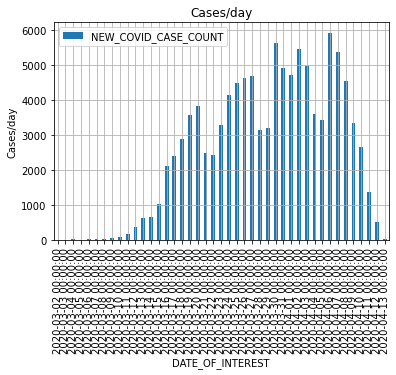

In [6]:
dat[["NEW_COVID_CASE_COUNT"]].plot(kind="bar")
plt.ylabel("Cases/day")
plt.title("Cases/day")

In [7]:
dat["Cases/day, 7 day avg"] = dat["NEW_COVID_CASE_COUNT"].rolling(window="7D").mean()

Text(0.5, 1.0, 'Cases/day, 7 day average')

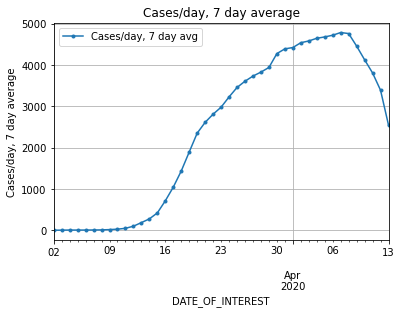

In [8]:
dat[["Cases/day, 7 day avg"]].plot(style=".-")
plt.ylabel("Cases/day, 7 day average")
plt.title("Cases/day, 7 day average")

In [10]:
hdat = pd.read_csv("../history.csv")

In [11]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-02,2020-04-13 14:04:00,1.00,NaN,NaN,12.0,12.000000,1
1,2020-03-03,2020-04-13 14:04:00,2.50,NaN,NaN,10.0,11.000000,4
2,2020-03-04,2020-04-13 14:04:00,5.00,NaN,NaN,13.0,11.666667,10
3,2020-03-05,2020-04-13 14:04:00,4.25,NaN,NaN,18.0,13.250000,2
4,2020-03-06,2020-04-13 14:04:00,5.00,NaN,NaN,17.0,14.000000,8


In [12]:
dates = hdat["AS_OF"].unique()

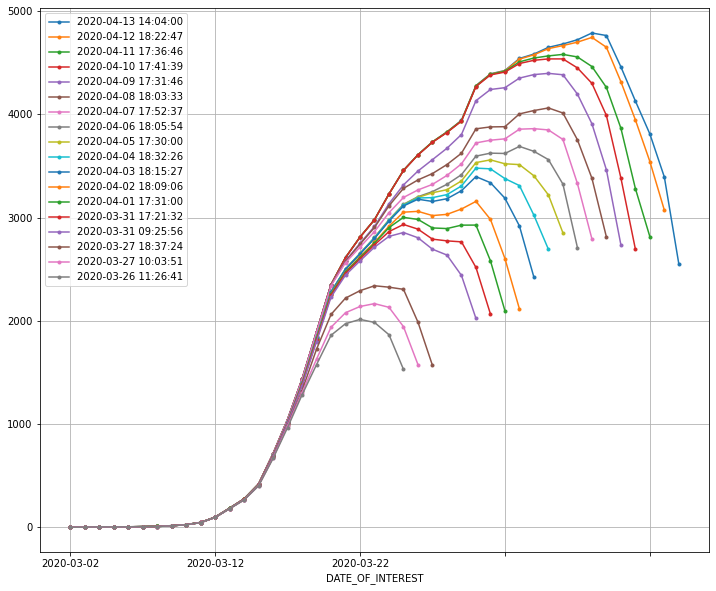

In [15]:
fig, ax = plt.subplots(figsize=(12,10))
# dl = [d for d in dates if ((d != "2020-03-27") and (d != "2020-03-31"))]
dl = [d for d in dates]
dl.sort(reverse=True)

for date in dl:
    
    dat = hdat[hdat["AS_OF"] == date]
    dat.set_index("DATE_OF_INTEREST", inplace=True)
    dat[["Cases/day, 7 day avg"]].plot(style=".-", ax=ax)

ax.legend(dl)
plt.show()

In [16]:
d = hdat[["AS_OF", "DATE_OF_INTEREST", "Cases/day, 7 day avg"]]

In [17]:
d.head()

,AS_OF,DATE_OF_INTEREST,"Cases/day, 7 day avg"
0,2020-04-13 14:04:00,2020-03-02,1.00
1,2020-04-13 14:04:00,2020-03-03,2.50
2,2020-04-13 14:04:00,2020-03-04,5.00
3,2020-04-13 14:04:00,2020-03-05,4.25
4,2020-04-13 14:04:00,2020-03-06,5.00


In [35]:
dp = hdat.pivot_table(index="DATE_OF_INTEREST",
                      columns="AS_OF",
                      values="Cases/day, 7 day avg",
                      fill_value=np.nan)

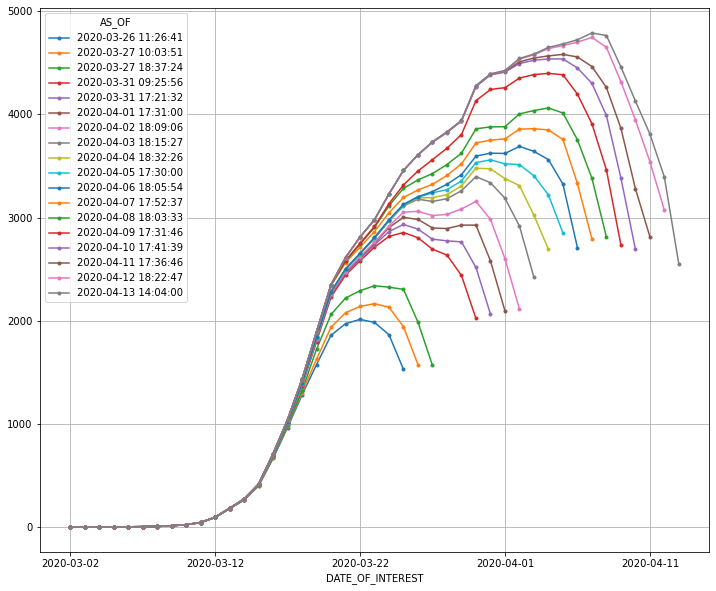

In [46]:
fig, ax = plt.subplots(figsize=(12,10))
dp.plot(style=".-", ax=ax)
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#plt.show()

In [25]:
dp.tail()

AS_OF,2020-03-26 11:26:41,2020-03-27 10:03:51,2020-03-27 18:37:24,2020-03-31 09:25:56,2020-03-31 17:21:32,2020-04-01 17:31:00,2020-04-02 18:09:06,2020-04-03 18:15:27,2020-04-04 18:32:26,2020-04-05 17:30:00,2020-04-06 18:05:54,2020-04-07 17:52:37,2020-04-08 18:03:33,2020-04-09 17:31:46,2020-04-10 17:41:39,2020-04-11 17:36:46,2020-04-12 18:22:47,2020-04-13 14:04:00
DATE_OF_INTEREST,,,,,,,,,,,,,,,,,,
2020-03-02,1.00,1.00,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00
2020-03-03,1.50,1.50,1.5,1.5,1.5,1.5,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.50
2020-03-04,4.00,4.00,4.0,4.0,4.0,4.0,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.666667,4.666667,4.666667,4.666667,4.666667,5.00
2020-03-05,3.25,3.25,3.5,3.5,3.5,3.5,3.750000,3.750000,3.750000,3.750000,3.750000,3.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.25
2020-03-06,4.20,4.20,4.4,4.4,4.4,4.4,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,4.800000,4.800000,4.800000,4.800000,4.800000,5.00


In [26]:
dp.head()

AS_OF,2020-03-26 11:26:41,2020-03-27 10:03:51,2020-03-27 18:37:24,2020-03-31 09:25:56,2020-03-31 17:21:32,2020-04-01 17:31:00,2020-04-02 18:09:06,2020-04-03 18:15:27,2020-04-04 18:32:26,2020-04-05 17:30:00,2020-04-06 18:05:54,2020-04-07 17:52:37,2020-04-08 18:03:33,2020-04-09 17:31:46,2020-04-10 17:41:39,2020-04-11 17:36:46,2020-04-12 18:22:47,2020-04-13 14:04:00
DATE_OF_INTEREST,,,,,,,,,,,,,,,,,,
2020-03-02,1.00,1.00,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00
2020-03-03,1.50,1.50,1.5,1.5,1.5,1.5,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.50
2020-03-04,4.00,4.00,4.0,4.0,4.0,4.0,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.666667,4.666667,4.666667,4.666667,4.666667,5.00
2020-03-05,3.25,3.25,3.5,3.5,3.5,3.5,3.750000,3.750000,3.750000,3.750000,3.750000,3.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.25
2020-03-06,4.20,4.20,4.4,4.4,4.4,4.4,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,4.800000,4.800000,4.800000,4.800000,4.800000,5.00


In [27]:
dp

AS_OF,2020-03-26 11:26:41,2020-03-27 10:03:51,2020-03-27 18:37:24,2020-03-31 09:25:56,2020-03-31 17:21:32,2020-04-01 17:31:00,2020-04-02 18:09:06,2020-04-03 18:15:27,2020-04-04 18:32:26,2020-04-05 17:30:00,2020-04-06 18:05:54,2020-04-07 17:52:37,2020-04-08 18:03:33,2020-04-09 17:31:46,2020-04-10 17:41:39,2020-04-11 17:36:46,2020-04-12 18:22:47,2020-04-13 14:04:00
DATE_OF_INTEREST,,,,,,,,,,,,,,,,,,
2020-03-02,1.00,1.00,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00
2020-03-03,1.50,1.50,1.5,1.5,1.5,1.5,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.50
2020-03-04,4.00,4.00,4.0,4.0,4.0,4.0,4.333333,4.333333,4.333333,4.333333,4.333333,4.333333,4.666667,4.666667,4.666667,4.666667,4.666667,5.00
2020-03-05,3.25,3.25,3.5,3.5,3.5,3.5,3.750000,3.750000,3.750000,3.750000,3.750000,3.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.25
2020-03-06,4.20,4.20,4.4,4.4,4.4,4.4,4.600000,4.600000,4.600000,4.600000,4.600000,4.600000,4.800000,4.800000,4.800000,4.800000,4.800000,5.00
